In [1]:
from robot_child.path_following.pure_pursuit import *

In [2]:
STEPS_PER_SECOND = 10
dt = 1/STEPS_PER_SECOND

In [3]:
pos_start = Point(x=10, y=100)
pos_end = Point(x=50, y=105)

bot = Robot(x=pos_start.x, y=pos_start.y)
bot

Robot(x=10, y=100, theta=0, velocity=0, angular_velocity=0)

In [4]:
point_controller = PointController(tolerance=1)
point_controller.set_target(pos_end)

In [5]:
history = []
for _ in range(1000):
    bot.velocity, bot.angular_velocity, *_ = point_controller.control(bot, dt)
    bot.step(dt)
    history.append((bot.x, bot.y))
    if point_controller.is_complete(bot):
        break
history = np.array(history)

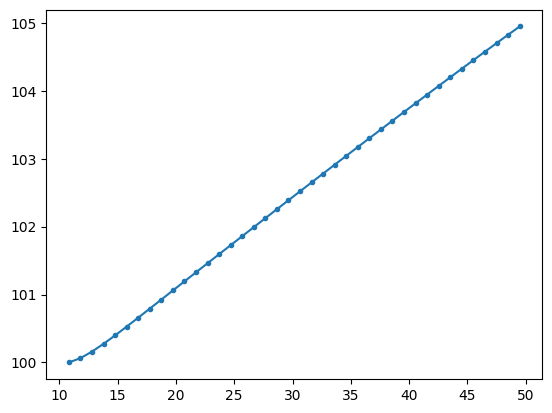

In [6]:
plt.plot(history[:, 0], history[:, 1], '.-')
plt.show()

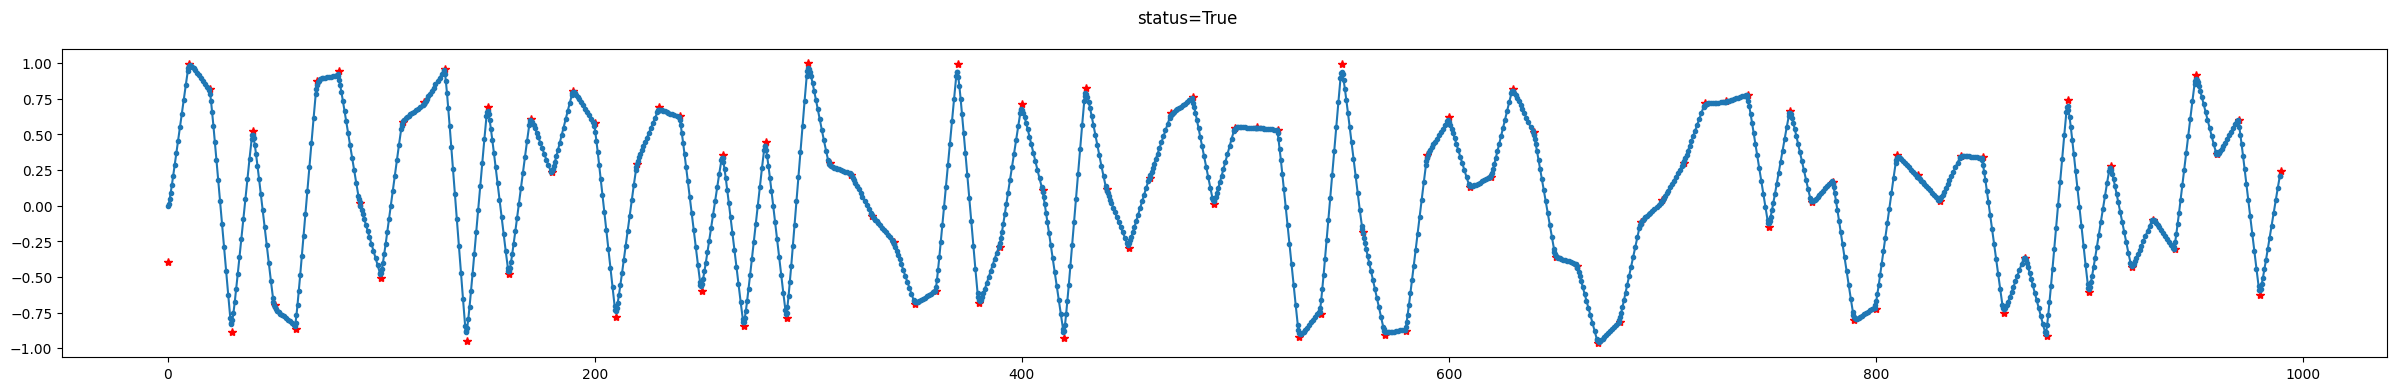

In [67]:
def simulate(dt, robot, controller, steps_max):
    history = []
    steps_taken = 0
    while not controller.is_complete(robot):
        robot.velocity, robot.angular_velocity = controller.control(robot, dt)
        robot.step(dt)
        steps_taken += 1
        history.append((robot.x, robot.y, robot.velocity, robot.angular_velocity))
        if steps_taken >= steps_max:
            return False, np.array(history)
    return True, np.array(history)

points = []
for step in range(100):
    points.append(Point(step*10, random.uniform(-1, 1)))

point_controller = PointController(tolerance=1)
path_controller = PathController(point_controller=point_controller, points=points)
bot = Robot(x=0, y=0)


status, history = simulate(dt, bot, path_controller, 2000)


fig, ax = plt.subplots(1, 1, figsize=(30, 4))

def plot_history(ax, points, history):
    for p in points:
        ax.plot(p.x, p.y, 'r*')
    ax.plot(history[:, 0], history[:, 1], '.-')

plot_history(ax, points, history)
fig.suptitle(f"{status=}")
plt.show()

In [73]:
bot.theta

-0.788724415271298

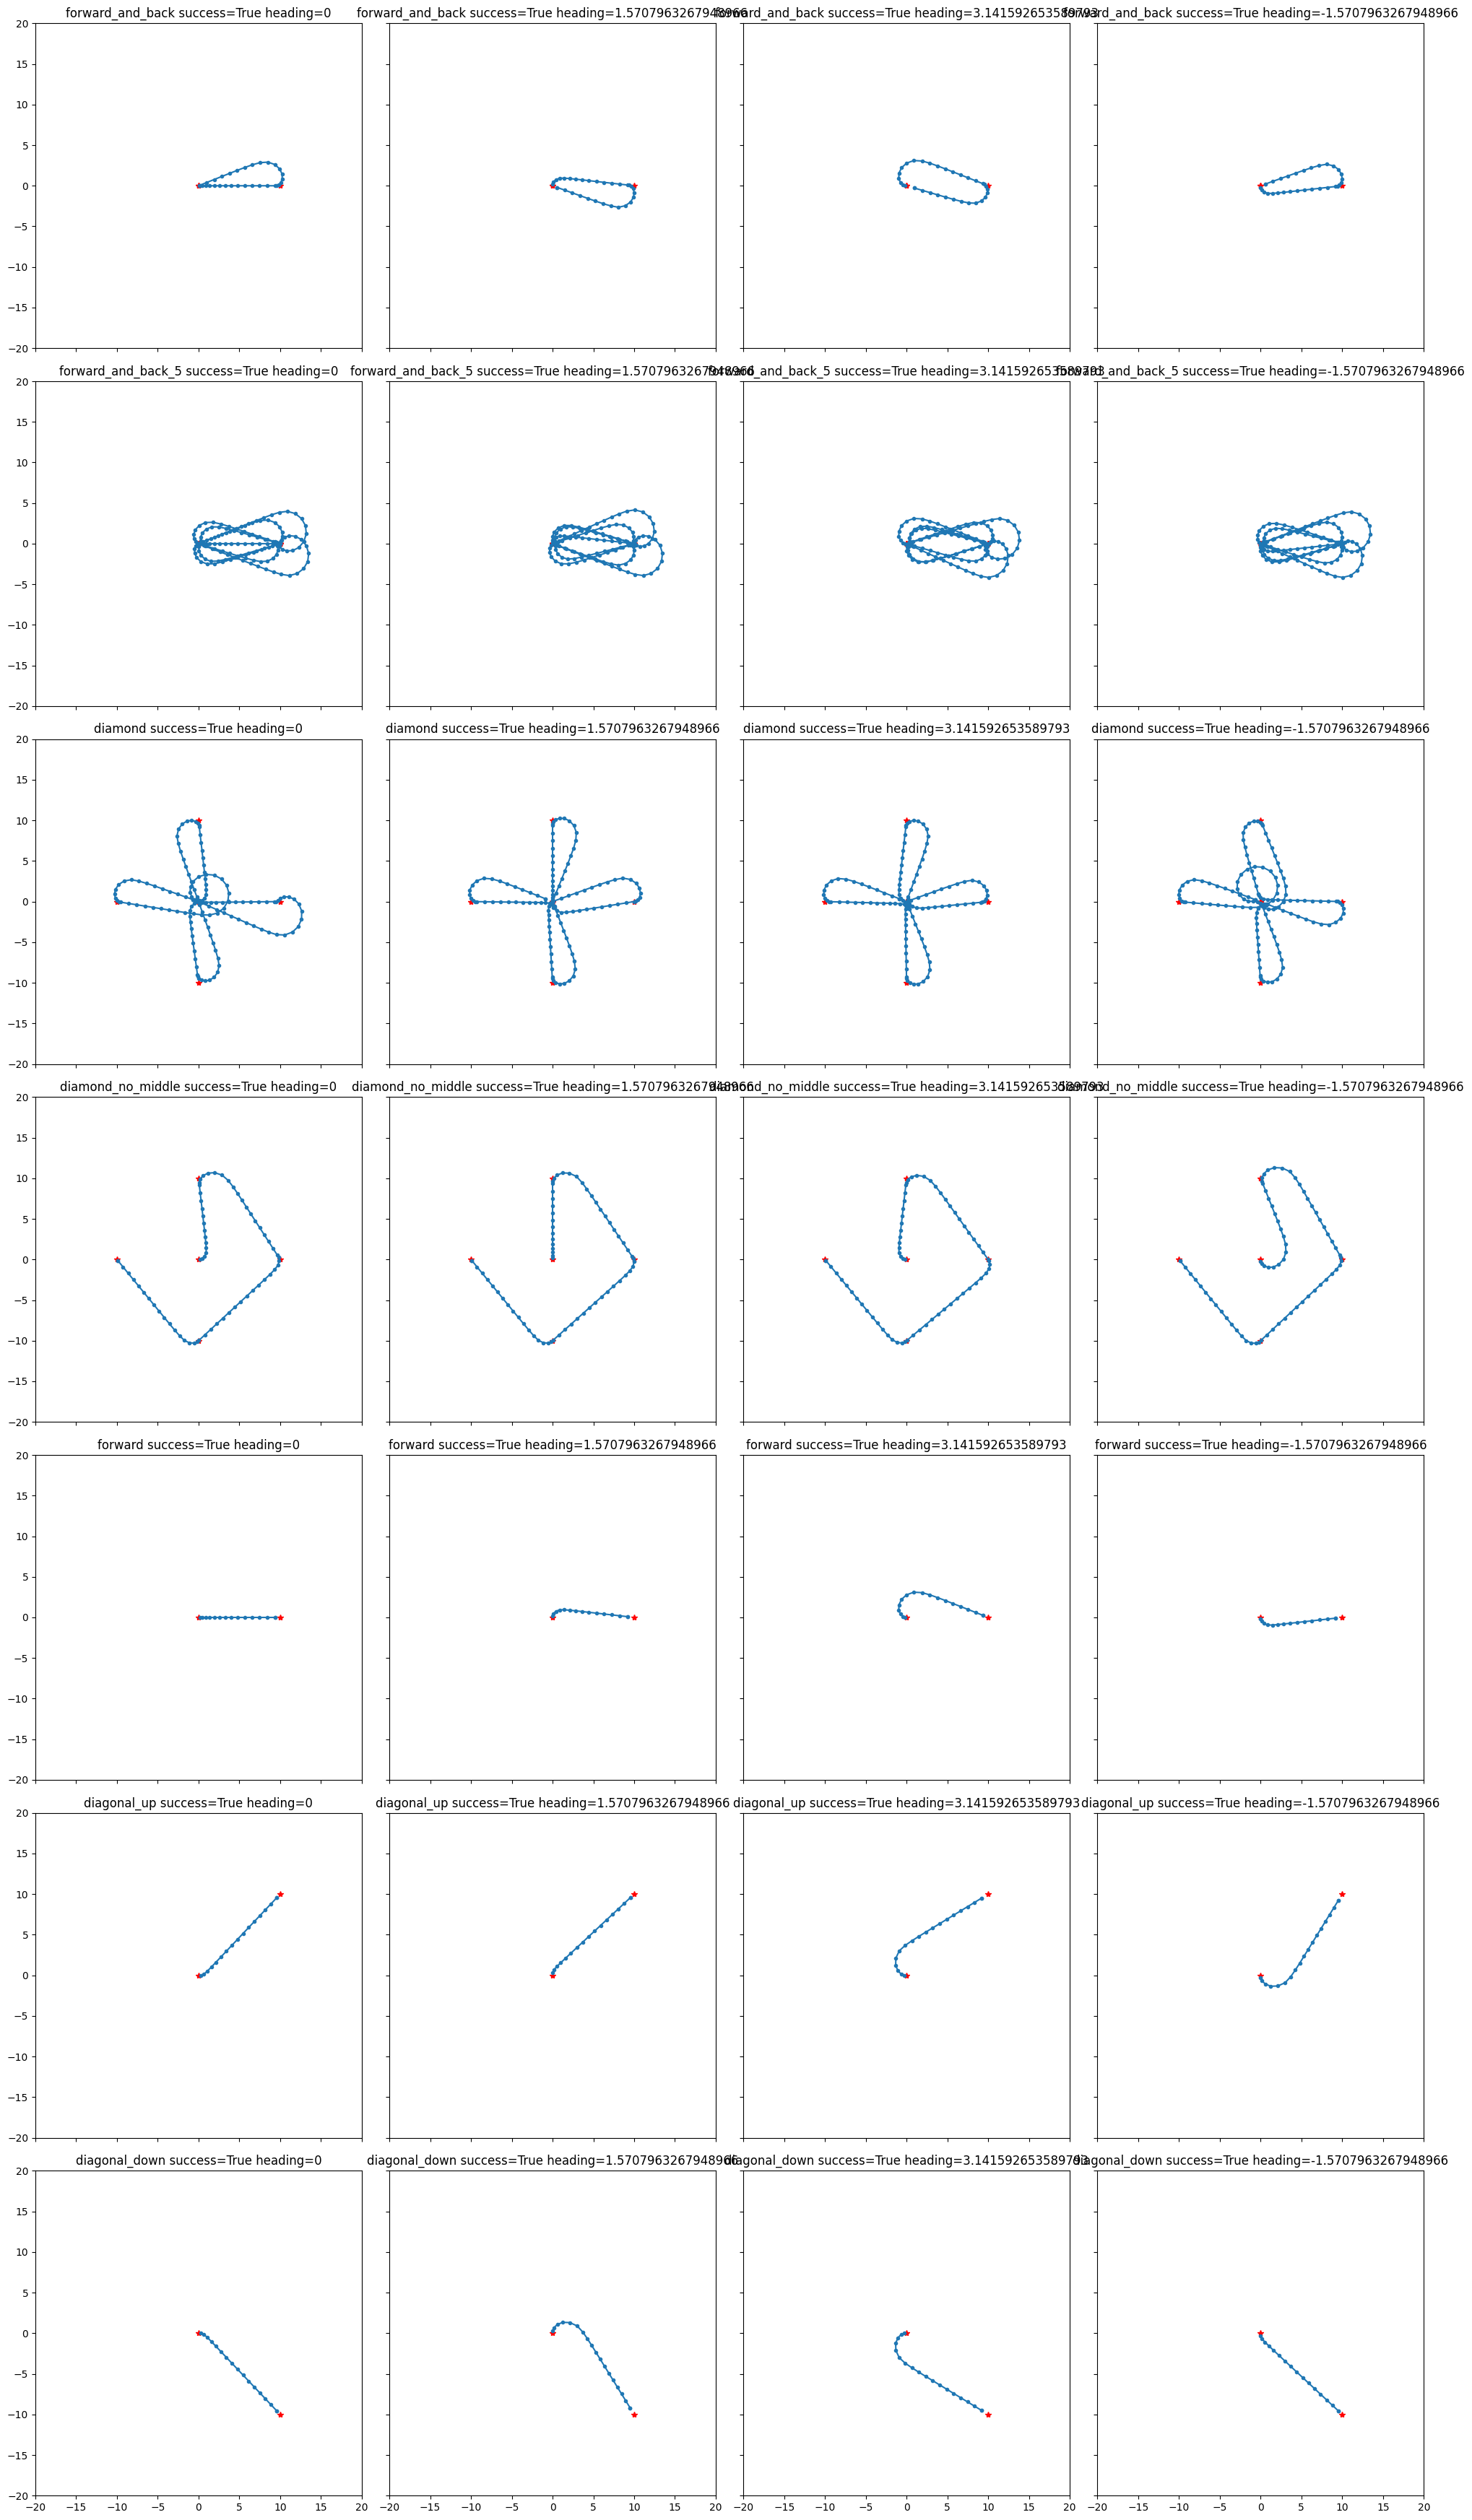

In [118]:
sanity_checks = {}

sanity_checks["forward_and_back"] = [Point(0, 0), Point(10, 0), Point(0, 0)]
sanity_checks["forward_and_back_5"] = [Point(0, 0), Point(10, 0)]*5
sanity_checks["diamond"] = [
    Point(0, 0),
    Point(0, 10),
    Point(0, 0),
    Point(10, 0),
    Point(0, 0),
    Point(0, -10),
    Point(0, 0),
    Point(-10, 0),
    Point(0, 0),
]
sanity_checks["diamond_no_middle"] = [
    Point(0, 0),
    Point(0, 10),
    Point(10, 0),
    Point(0, -10),
    Point(-10, 0),
]
sanity_checks["forward"] = [Point(0, 0), Point(10, 0)]
sanity_checks["diagonal_up"] = [Point(0, 0), Point(10, 10)]
sanity_checks["diagonal_down"] = [Point(0, 0), Point(10, -10)]

start_headings = [0, pi/2, pi, -pi/2]

nrows = len(sanity_checks)
ncols = len(start_headings)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5), sharex=True, sharey=True)
axes = axes.flatten()

i = 0
for name, points in sanity_checks.items():
    for heading in start_headings:
        point_controller = PointController(tolerance=1, KHp=8, KHi=0)
        path_controller = PathController(point_controller=point_controller, points=points)
        bot = Robot(x=0, y=0, theta=heading)
        status, history = simulate(dt, bot, path_controller, 200)

        ax = axes[i]
        ax.set_xlim(-20, 20)
        ax.set_ylim(-20, 20)
        ax.set_title(f"{name} success={status} {heading=}")
        plot_history(ax, points, history)
        i += 1

plt.tight_layout()
plt.show()